# Análise de xT (Expected Threat) de um determinado jogador numa determinada partida

## Instalação das Bibliotecas

In [188]:
#!pip install mplsoccer

In [189]:
#!pip install statsbombpy

## Importação das Blibliotecas

In [1]:
from mplsoccer.pitch import Pitch
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Seleção dos Dados

In [2]:
events = sb.events(3773369)
events.tail(15)

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
4791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Jaime Seoane Valenciano,NaN,Huesca,00:14:34.815,Substitution,NaN
4792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Ronald Federico Araújo da Silva,NaN,Barcelona,00:17:16.380,Substitution,NaN
4793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Moriba Kourouma Kourouma,NaN,Barcelona,00:23:34.793,Substitution,NaN
4794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Francisco António Machado Mota de Castro Trincão,NaN,Barcelona,00:23:35.167,Substitution,NaN
4795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Denis Vavro,NaN,Huesca,00:32:17.311,Substitution,NaN
4796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Pedro López Muñoz,NaN,Huesca,00:32:19.632,Substitution,NaN
4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Javier Ontiveros Parra,NaN,Huesca,00:32:21.708,Substitution,NaN
4798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Martin Braithwaite Christensen,NaN,Barcelona,00:39:21.812,Substitution,NaN
4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Ricard Puig Martí,NaN,Barcelona,00:39:29.086,Substitution,NaN
4800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Huesca,00:20:44.639,Injury Stoppage,NaN


## Preparação dos Dados

In [3]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_end_location', 'pass_goal_assist', 'pass_hei

In [4]:
events.play_pattern.unique()

array(['Regular Play', 'Other', 'From Kick Off', 'From Throw In',
       'From Counter', 'From Keeper', 'From Goal Kick', 'From Free Kick',
       'From Corner'], dtype=object)

In [5]:
passes = events[(events['type'] == 'Pass') & (events['play_pattern'] == 'Regular Play')]

In [6]:
passes.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:02:11.905,Pass,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:02:13.669,Pass,True
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:02:15.858,Pass,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:02:20.055,Pass,True
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:02:20.832,Pass,NaN


In [7]:
x = [x[0] for x in passes['location']]
y = [y[1] for y in passes['location']]
end_x = [x[0] for x in passes['pass_end_location']]
end_y = [y[1] for y in passes['pass_end_location']]

In [8]:
passes = passes.assign(x=x, y=y, end_x=end_x, end_y=end_y)

In [9]:
passes.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,substitution_replacement,tactics,team,timestamp,type,under_pressure,x,y,end_x,end_y
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Barcelona,00:02:11.905,Pass,NaN,37.3,57.3,44.3,49.8
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Barcelona,00:02:13.669,Pass,True,46.3,49.8,47.1,39.5
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Barcelona,00:02:15.858,Pass,NaN,43.9,37.5,50.8,21.0
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Barcelona,00:02:20.055,Pass,True,69.8,12.4,77.0,3.7
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Barcelona,00:02:20.832,Pass,NaN,78.0,3.4,86.3,22.8


In [10]:
passes.team.unique()

array(['Barcelona', 'Huesca'], dtype=object)

In [11]:
passes.pass_outcome.unique()

array([nan, 'Incomplete', 'Out', 'Unknown', 'Pass Offside'], dtype=object)

In [12]:
passes = passes[~passes['pass_outcome'].isin(['Incomplete', 'Out', 'Pass Offside', 'Unknown'])]

In [13]:
passes.pass_outcome.unique()

array([nan], dtype=object)

## Importação da Tabela xT

In [14]:
xt_df = pd.read_csv('xT_metric.csv', header=None)
xt_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926
1,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
2,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
5,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
6,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
7,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926


In [15]:
xT = np.array(xt_df)

In [16]:
xT

array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138,

In [17]:
xT.shape

(8, 12)

In [18]:
xT_rows, xT_cols = xT.shape

In [19]:
xT_rows, xT_cols

(8, 12)

In [20]:
pd.cut(passes['end_y'], bins=xT_rows, labels=False)

54      5
55      3
56      2
57      0
58      2
       ..
1358    4
1359    2
1360    2
1361    3
1362    1
Name: end_y, Length: 582, dtype: int64

## Junção dos Dados

In [22]:
passes['x1_bin'] = pd.cut(passes.loc[:, 'x'], bins=xT_cols, labels=False)
passes['y1_bin'] = pd.cut(passes.loc[:, 'y'], bins=xT_rows, labels=False)
passes['x2_bin'] = pd.cut(passes.loc[:, 'end_x'], bins=xT_cols, labels=False)
passes['y2_bin'] = pd.cut(passes.loc[:, 'end_y'], bins=xT_rows, labels=False)

passes['start_zone_value'] = passes[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
passes['end_zone_value'] = passes[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
passes['xT%'] = round((passes.loc[:, 'end_zone_value'] / passes.loc[:, 'start_zone_value'] - 1), 2)

In [23]:
passes.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,y,end_x,end_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT%
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.3,44.3,49.8,3,5,4,5,0.011105,0.012692,0.14
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.8,47.1,39.5,4,5,4,3,0.012692,0.012626,-0.01
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5,50.8,21.0,4,3,5,2,0.012626,0.014291,0.13
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.4,77.0,3.7,7,1,7,0,0.018703,0.017451,-0.07
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,86.3,22.8,7,0,8,2,0.017451,0.024122,0.38


In [24]:
teams = list(passes.team.unique())
teams

['Barcelona', 'Huesca']

In [29]:
team = passes[passes['team'] == teams[0]].team.unique()[0]
passes_final = passes[passes.team == team]

## Gráfico

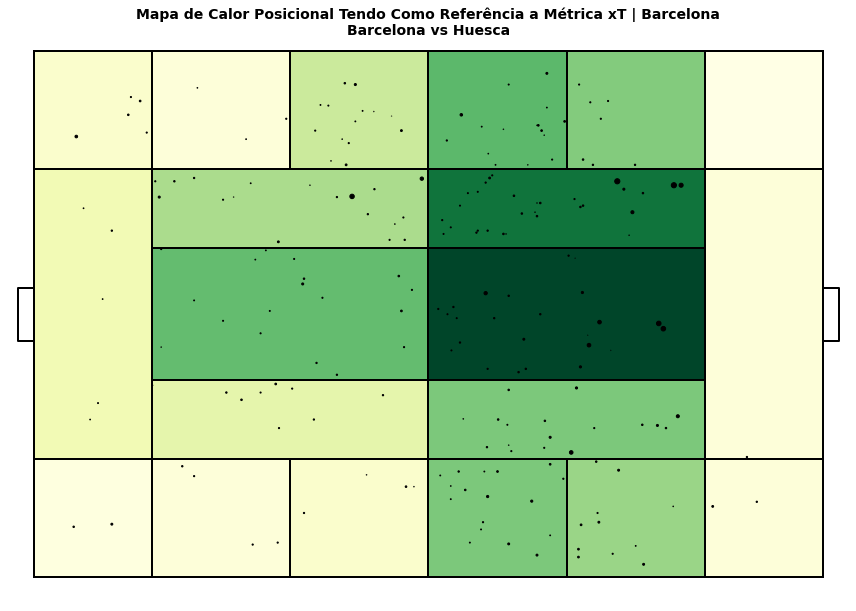

In [30]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', goal_type='box')
fig, ax = pitch.draw(figsize=(12, 10))
plt.title(f"Mapa de Calor Posicional Tendo Como Referência a Métrica xT | {team}\n{teams[0]} vs {teams[1]}", fontweight='bold', fontsize=14,
          pad=-10)
positional = pitch.bin_statistic_positional(passes_final.x, passes_final.y, values=passes_final['xT%'], statistic='count', 
                                            positional='full', normalize=True)
pitch.heatmap_positional(positional, edgecolors='black', cmap='YlGn', ax=ax)
pitch.scatter(passes_final.x, passes_final.y, s=passes_final['xT%']*10, c='black', ax=ax);